### Import Library

In [8]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [9]:
tuning = pd.read_csv('hasiltuning/hasiltuning.csv')
tuning

,hidden_layer,hidden_neuron,aktivasi,lr,epoch,mse,bobot,bias,bobot_output,bias_output
0,1,"(2,)",relu,0.0001,100,0.020067,"[[[np.float64(-0.2115004254608428), np.float64...","[[0.9520836613170182, np.float64(-1.0489468079...","[np.float64(0.5322911919751608), np.float64(0....",0.523419
1,1,"(2,)",relu,0.0001,200,0.026818,"[[[np.float64(-0.23319311762303788), np.float6...","[[0.8636145157378688, np.float64(-0.0051687285...","[np.float64(0.8383170289340438), np.float64(0....",0.316015
2,1,"(2,)",relu,0.0010,100,0.015435,"[[[np.float64(-1.0863034790825625), np.float64...","[[0.8568832896060903, np.float64(-6.8447873256...","[np.float64(0.18119579527989138), np.float64(0...",0.771540
3,1,"(2,)",relu,0.0010,200,0.043557,"[[[np.float64(-5.552634851416673), np.float64(...","[[0.3756027501415624, np.float64(-10.822161083...","[np.float64(0.6264503419497636), np.float64(0....",0.524038
4,1,"(2,)",sigmoid,0.0001,100,0.031862,"[[[np.float64(0.6609737479158626), np.float64(...","[[0.7547985812030308, np.float64(0.58972267443...","[np.float64(0.4170201829835619), np.float64(0....",0.993960
...,...,...,...,...,...,...,...,...,...,...
139,2,"(4, 4)",sigmoid,0.0010,200,0.013056,"[[[np.float64(0.7394544189110158), np.float64(...","[[0.9789103047394698, 0.6092786658504609, 0.59...","[np.float64(0.7818628562337839), np.float64(0....",0.348655
140,2,"(4, 4)",tanh,0.0001,100,0.009732,"[[[np.float64(0.9287346138580468), np.float64(...","[[0.27947959216669627, 0.5595790972298365, 0.7...","[np.float64(0.26597649499849546), np.float64(0...",0.093759
141,2,"(4, 4)",tanh,0.0001,200,0.012109,"[[[np.float64(0.7897122095154433), np.float64(...","[[0.4493060715239844, 0.6641888756993216, 0.88...","[np.float64(0.10457641229912853), np.float64(0...",0.004192
142,2,"(4, 4)",tanh,0.0010,100,0.012790,"[[[np.float64(0.15825568671174747), np.float64...","[[0.7051507398080106, 0.6706885188104347, 0.25...","[np.float64(0.1600503300996589), np.float64(0....",0.824732


In [10]:
X_test = pd.read_csv('dataset/X_test.csv').values
X_test

array([[0.72924046, 0.78047824, 0.77438659, 0.37263913],
       [0.66017316, 0.5876127 , 0.6888091 , 0.28629199],
       [0.50314837, 0.29086633, 0.48473968, 0.06663297],
       ...,
       [0.75816608, 0.77224618, 0.77558348, 0.45094435],
       [0.5733963 , 0.4880439 , 0.76181927, 0.37314462],
       [0.64285714, 0.46961976, 0.71813285, 0.29001425]])

In [11]:
y_test = pd.read_csv('dataset/y_test.csv').values
y_test

array([[0.8115351 ],
       [0.70841829],
       [0.42805127],
       [0.54631518],
       [0.67040489],
       [0.83236237],
       [0.69967958],
       [0.63180891],
       [0.68948442],
       [0.6307894 ],
       [0.90940868],
       [0.55257792],
       [0.52665307],
       [0.77468686],
       [0.68933877],
       [0.5576755 ],
       [0.64797553],
       [0.48762016],
       [0.87110399],
       [0.76696767],
       [0.68700845],
       [0.70128168],
       [0.69851442],
       [0.73026507],
       [0.64156714],
       [0.73565395],
       [0.65452957],
       [0.6427323 ],
       [0.72473056],
       [0.56918147],
       [0.60602971],
       [0.76565686],
       [0.61141858],
       [0.79230993],
       [0.81794349],
       [0.93955724],
       [0.66239441],
       [0.65117973],
       [0.69866006],
       [0.68642587],
       [0.61112729],
       [0.72429362],
       [0.58068745],
       [0.80847655],
       [0.77119138],
       [0.6974949 ],
       [0.62875036],
       [0.800

##### Fungsi aktivasi

In [12]:
def aktivasiX(activ, x): 
    # aktivasi relu
    if activ == 'relu':
        if x >= 0:
            return x
        else:
            return 0
    # aktivasi sigmoid
    elif activ == 'sigmoid':
        return 1 / (1 + math.exp(-x))
    # aktivasi softmax
    elif activ == 'softmax':
        return 1
    # aktivasi tanh
    else:
        return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def turunanaktivasiX(activ, x): 
    # turunan aktivasi relu
    if activ == 'relu':
        if x > 0:
            return 1
        else:
            return 0
    # turunan aktivasi sigmoid
    elif activ == 'sigmoid':
        sig = 1 / (1 + math.exp(-x))
        return sig * (1 - sig)
    # turunan aktivasi softmax
    elif activ == 'softmax':
        return 0
    # turunan aktivasi tanh
    else:
        tan = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
        return 1 - (tan) ** 2

##### Best parameter

In [13]:
best_index = tuning['mse'].idxmin()
best_hidden_layer_global = tuning['hidden_layer'][best_index]
best_hidden_neuron_global = tuning['hidden_neuron'][best_index]
best_aktivasi_global = tuning['aktivasi'][best_index]
best_lr_global = tuning['lr'][best_index]
best_epoch_global = tuning['epoch'][best_index]
best_mse_global = tuning['mse'][best_index]
best_bobot_global = tuning['bobot'][best_index]
best_bias_global = tuning['bias'][best_index]
best_bobot_output_global = tuning['bobot_output'][best_index]
best_bias_output_global = tuning['bias_output'][best_index]

print("Best Index:", best_index)
print("Best Hidden Layer:", best_hidden_layer_global)
print("Best Hidden Neuron:", best_hidden_neuron_global)
print("Best Aktivasi:", best_aktivasi_global)
print("Best Learning Rate:", best_lr_global)
print("Best Epoch:", best_epoch_global)
print("Best MSE:", best_mse_global)
print("Best Bobot:", best_bobot_global)
print("Best Bias:", best_bias_global)
print("Best Bobot Output:", best_bobot_output_global)
print("Best Bias Output:", best_bias_output_global)

Best Index: 15
Best Hidden Layer: 1
Best Hidden Neuron: (3,)
Best Aktivasi: relu
Best Learning Rate: 0.001
Best Epoch: 200
Best MSE: 0.0005452166695239
Best Bobot: [[[np.float64(2.0159632089817685), np.float64(-1.8299287149071823), np.float64(-1.842935741183223)], [np.float64(2.5415636820054486), np.float64(-1.457226755340261), np.float64(-2.0918840604998516)], [np.float64(2.224912276581601), np.float64(-1.5851173370352567), np.float64(-2.4934926775028323)], [np.float64(0.9719513158736577), np.float64(-0.1482270822619916), np.float64(-0.2114612578514493)]]]
Best Bias: [[0.8447058299492598, 0.8005625439819231, np.float64(-3.15170573284851)]]
Best Bobot Output: [np.float64(0.12852416768005726), np.float64(0.43139843728352856), np.float64(0.4713217165646258)]
Best Bias Output: 0.0164623070443828


##### Mengembalikan menjadi list

In [14]:
best_bobot_global = eval(best_bobot_global)
best_bias_global = eval(best_bias_global)
best_bobot_output_global = eval(best_bobot_output_global)

### Prediksi X_test

##### Fungsi prediksi X_test

In [15]:
def predict(X_test, y_test, bobot, bias, bobot_output, bias_output, aktivasi):
    prediksi = []
    error = []
    aktual = []
    for i in range(len(X_test)):
        # FEEDFORWARD
        # Operasi pada Hidden Layer
        aktivasi_hidden = []
        for j in range(len(bobot)):  # untuk setiap hidden layer
            aktivasi_hidden_temp = []
            for k in range(len(bobot[j][0])):  # jumlah neuron di hidden layer
                sumXbobot = 0
                if j == 0:  # layer pertama
                    for l in range(4):  # jumlah neuron input
                        sumXbobot += bobot[j][l][k] * X_test[i][l]
                else:
                    for l in range(len(aktivasi_hidden[j - 1])):
                        sumXbobot += bobot[j][l][k] * aktivasi_hidden[j - 1][l]
                sumXbobotbias = bias[j][k] + sumXbobot
                aktivasi_hidden_temp.append(aktivasiX(aktivasi, sumXbobotbias))
            aktivasi_hidden.append(aktivasi_hidden_temp)

        # Operasi pada Output Layer
        sumZbobotoutput = 0
        for j in range(len(aktivasi_hidden[-1])):
            sumZbobotoutput += bobot_output[j] * aktivasi_hidden[-1][j]
        sumZbobotoutput_biasoutput = bias_output + sumZbobotoutput
        predik = aktivasiX(aktivasi, sumZbobotoutput_biasoutput)
        prediksi.append(predik)
        error.append(abs(y_test[i][0] - predik))

    return prediksi, error

##### Pemanggilan fungsi prediksi

In [16]:
prediksi, error = predict(X_test, y_test, best_bobot_global, best_bias_global, best_bobot_output_global, best_bias_output_global, best_aktivasi_global)

##### Visualisasi hasil prediksi dan aktual

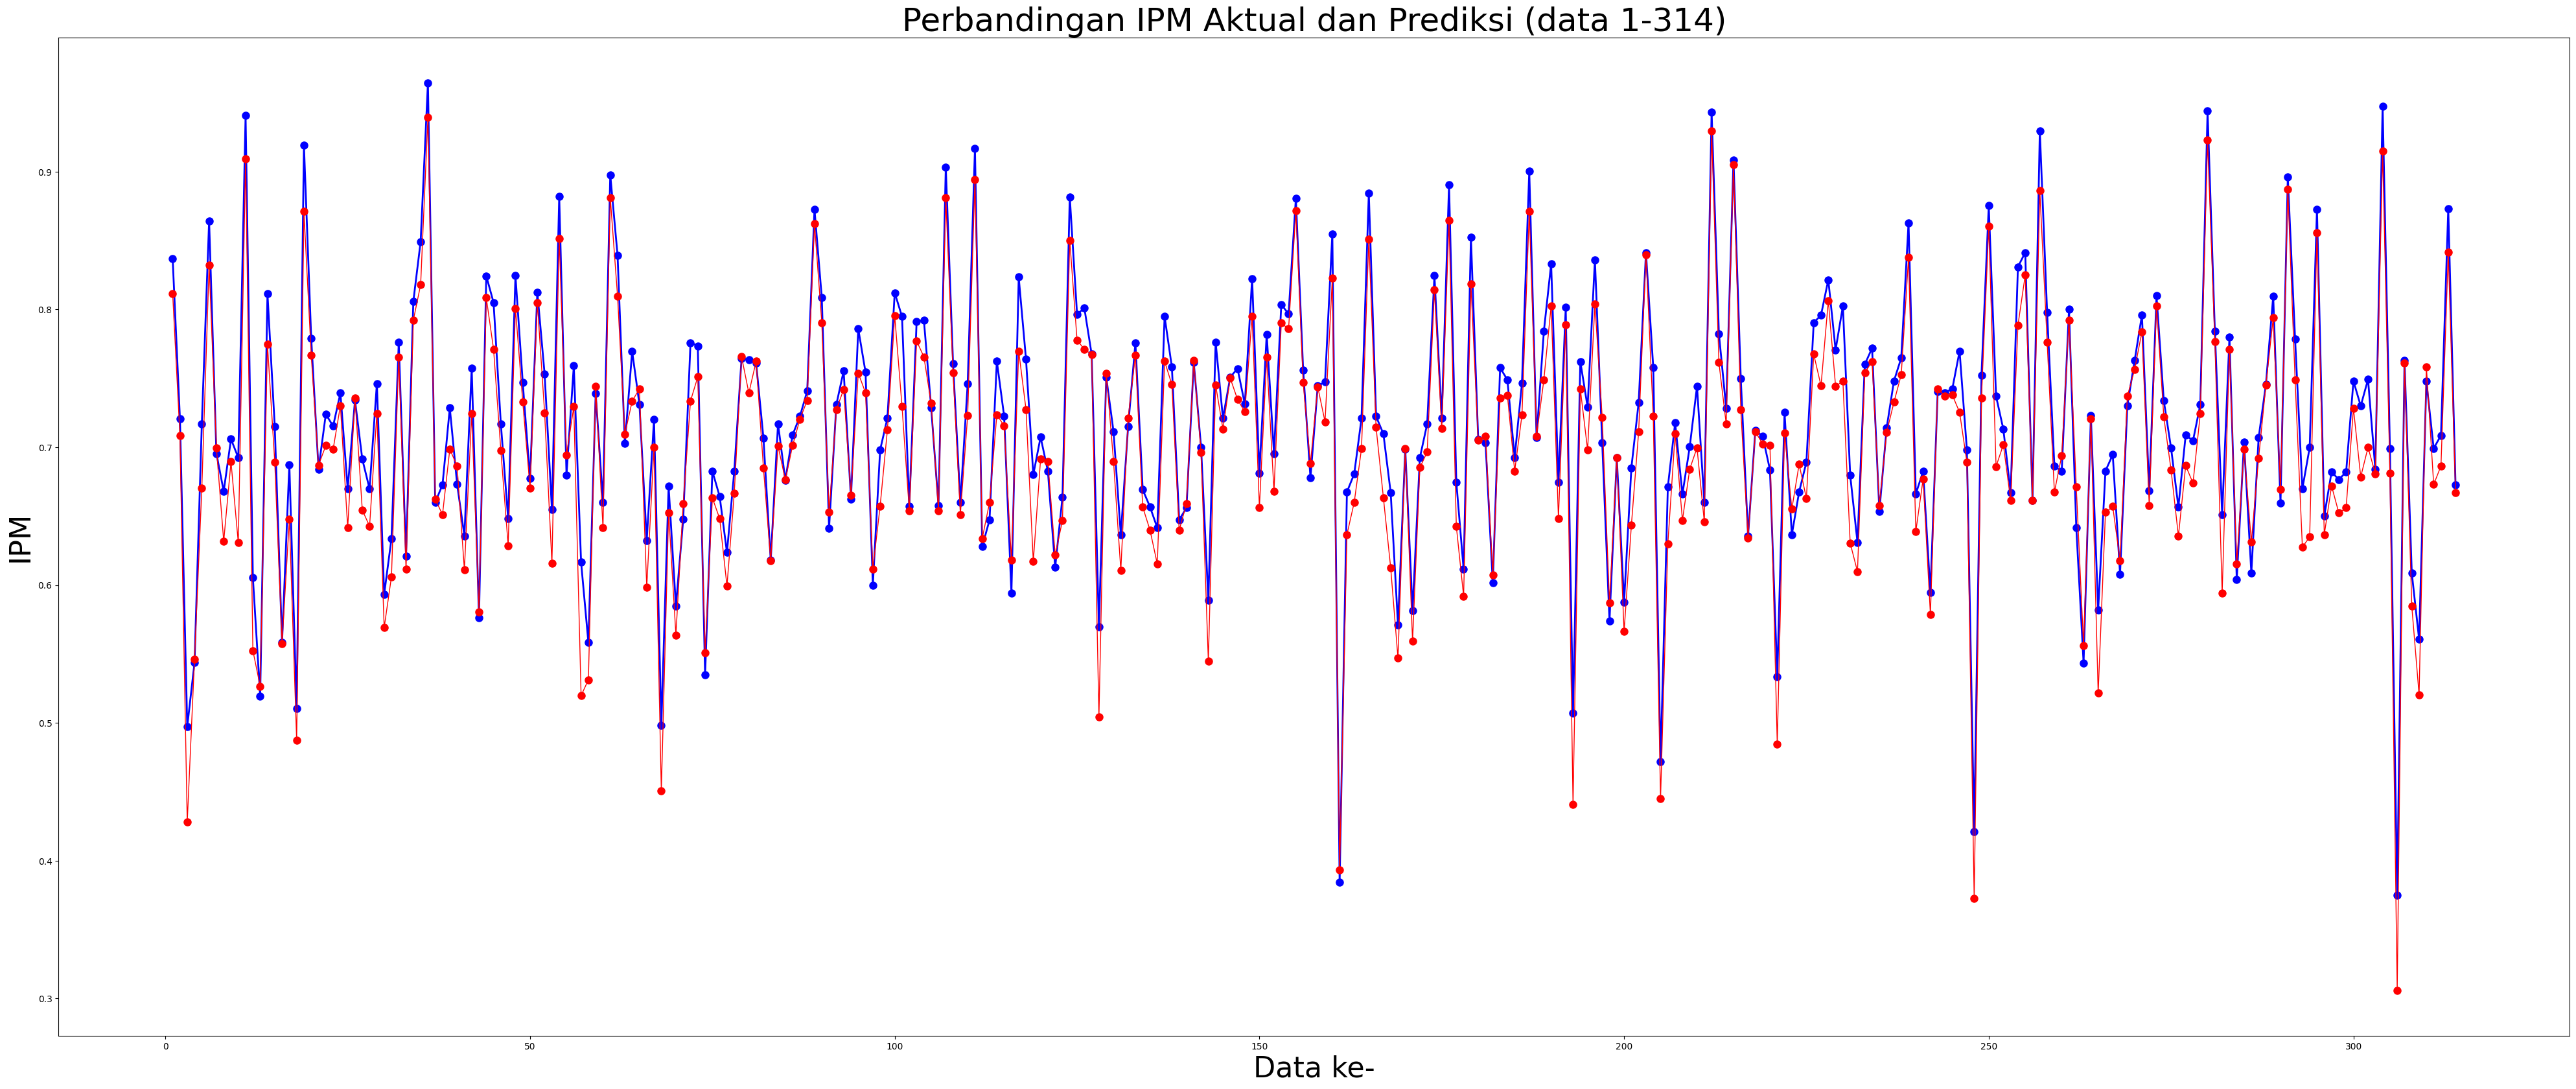

In [17]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[:314], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[:314], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 1-314)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('IPM', fontsize=32)
plt.show()

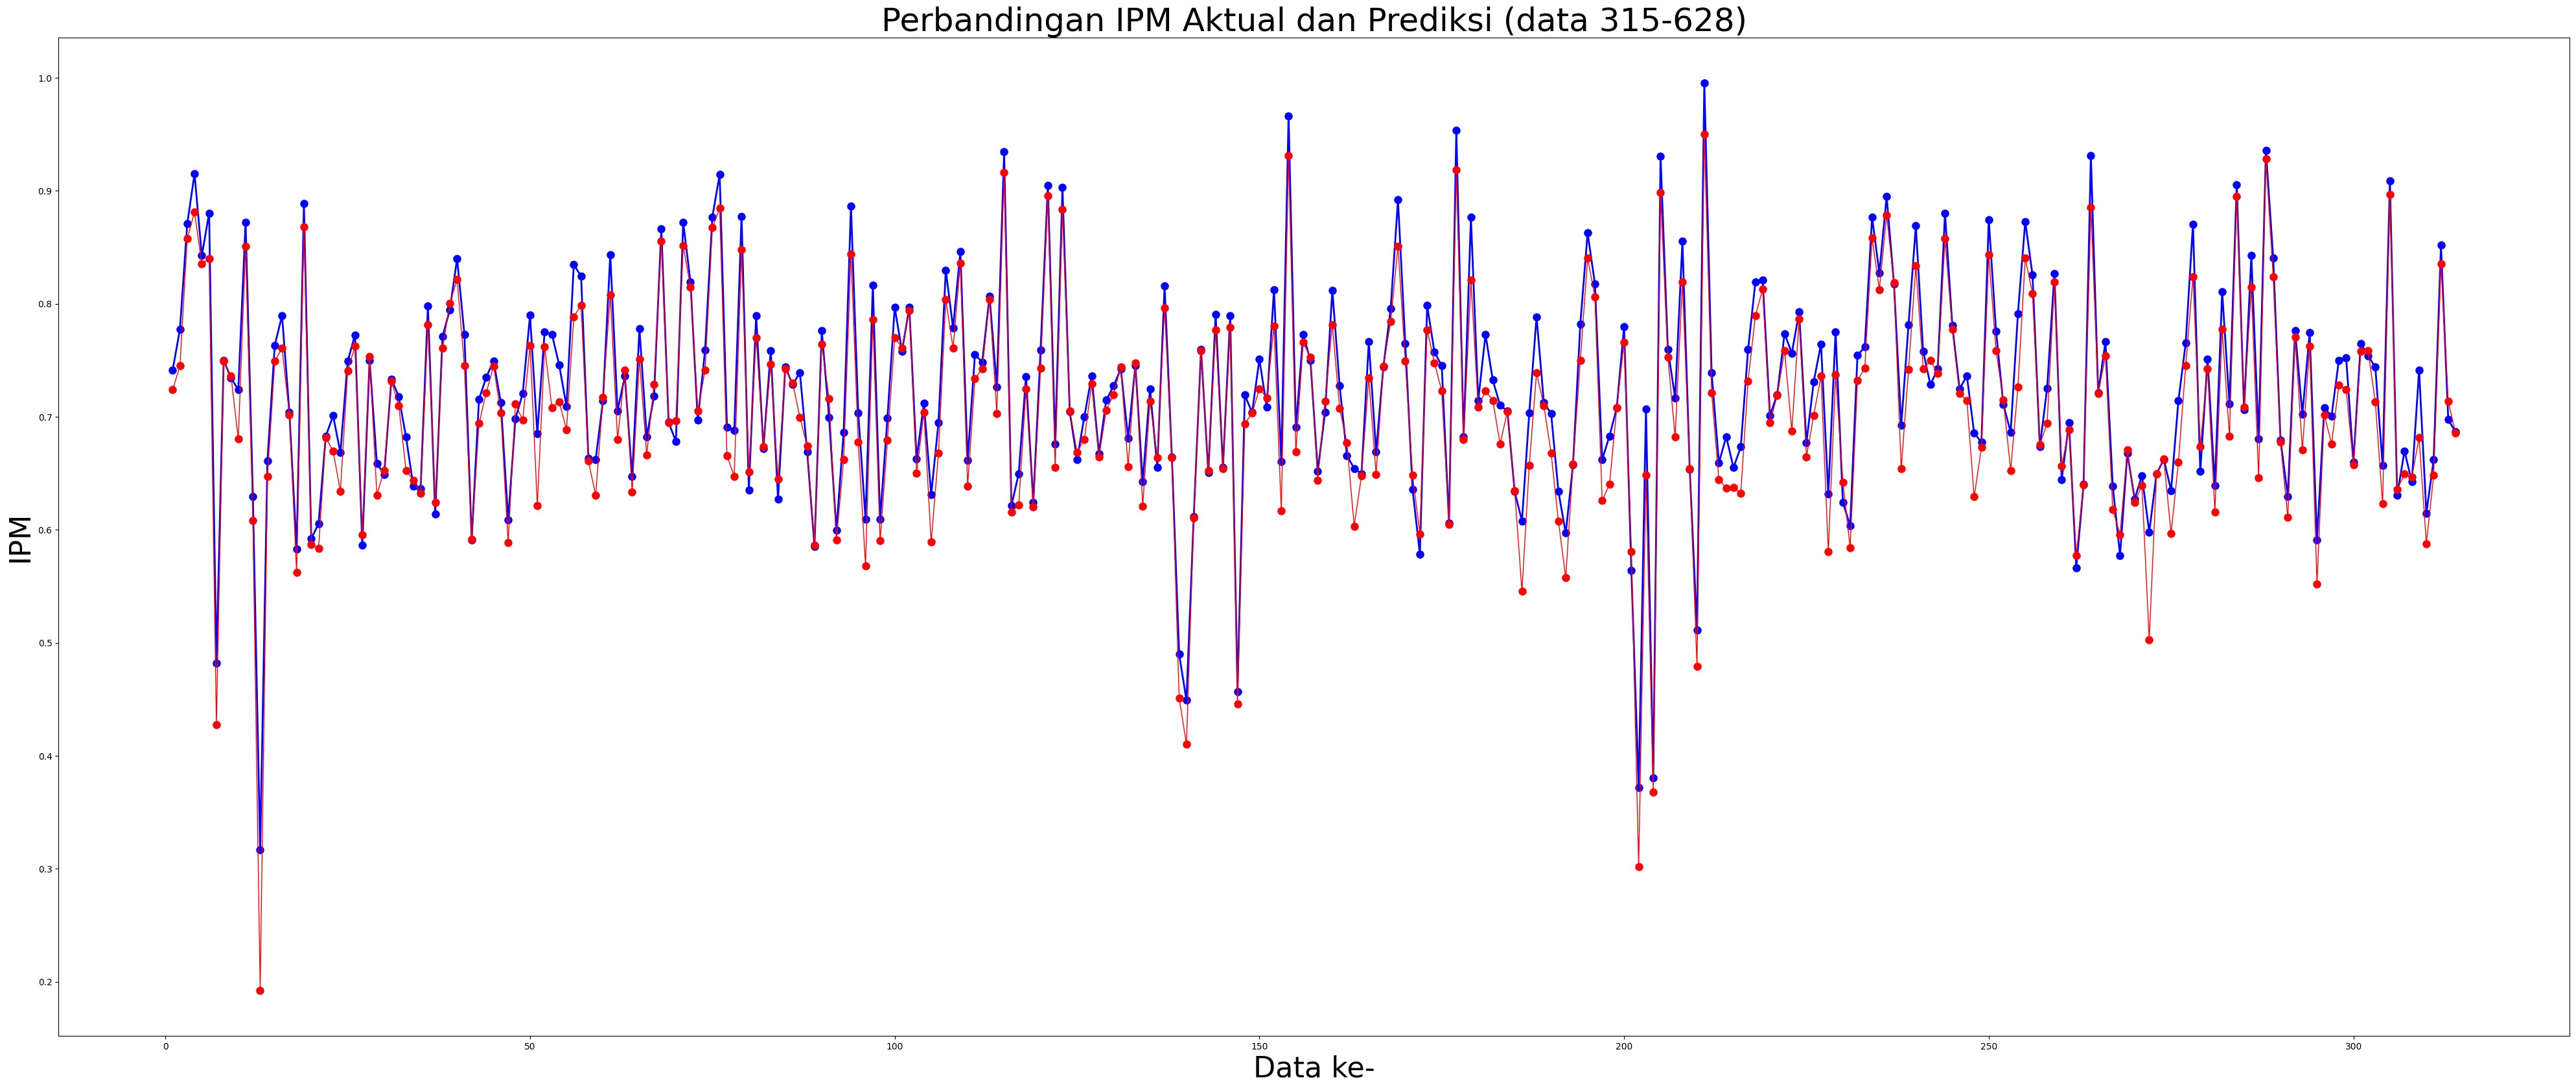

In [18]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[314:], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[314:], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 315-628)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('IPM', fontsize=32)
plt.show()

##### Visualisasi Error

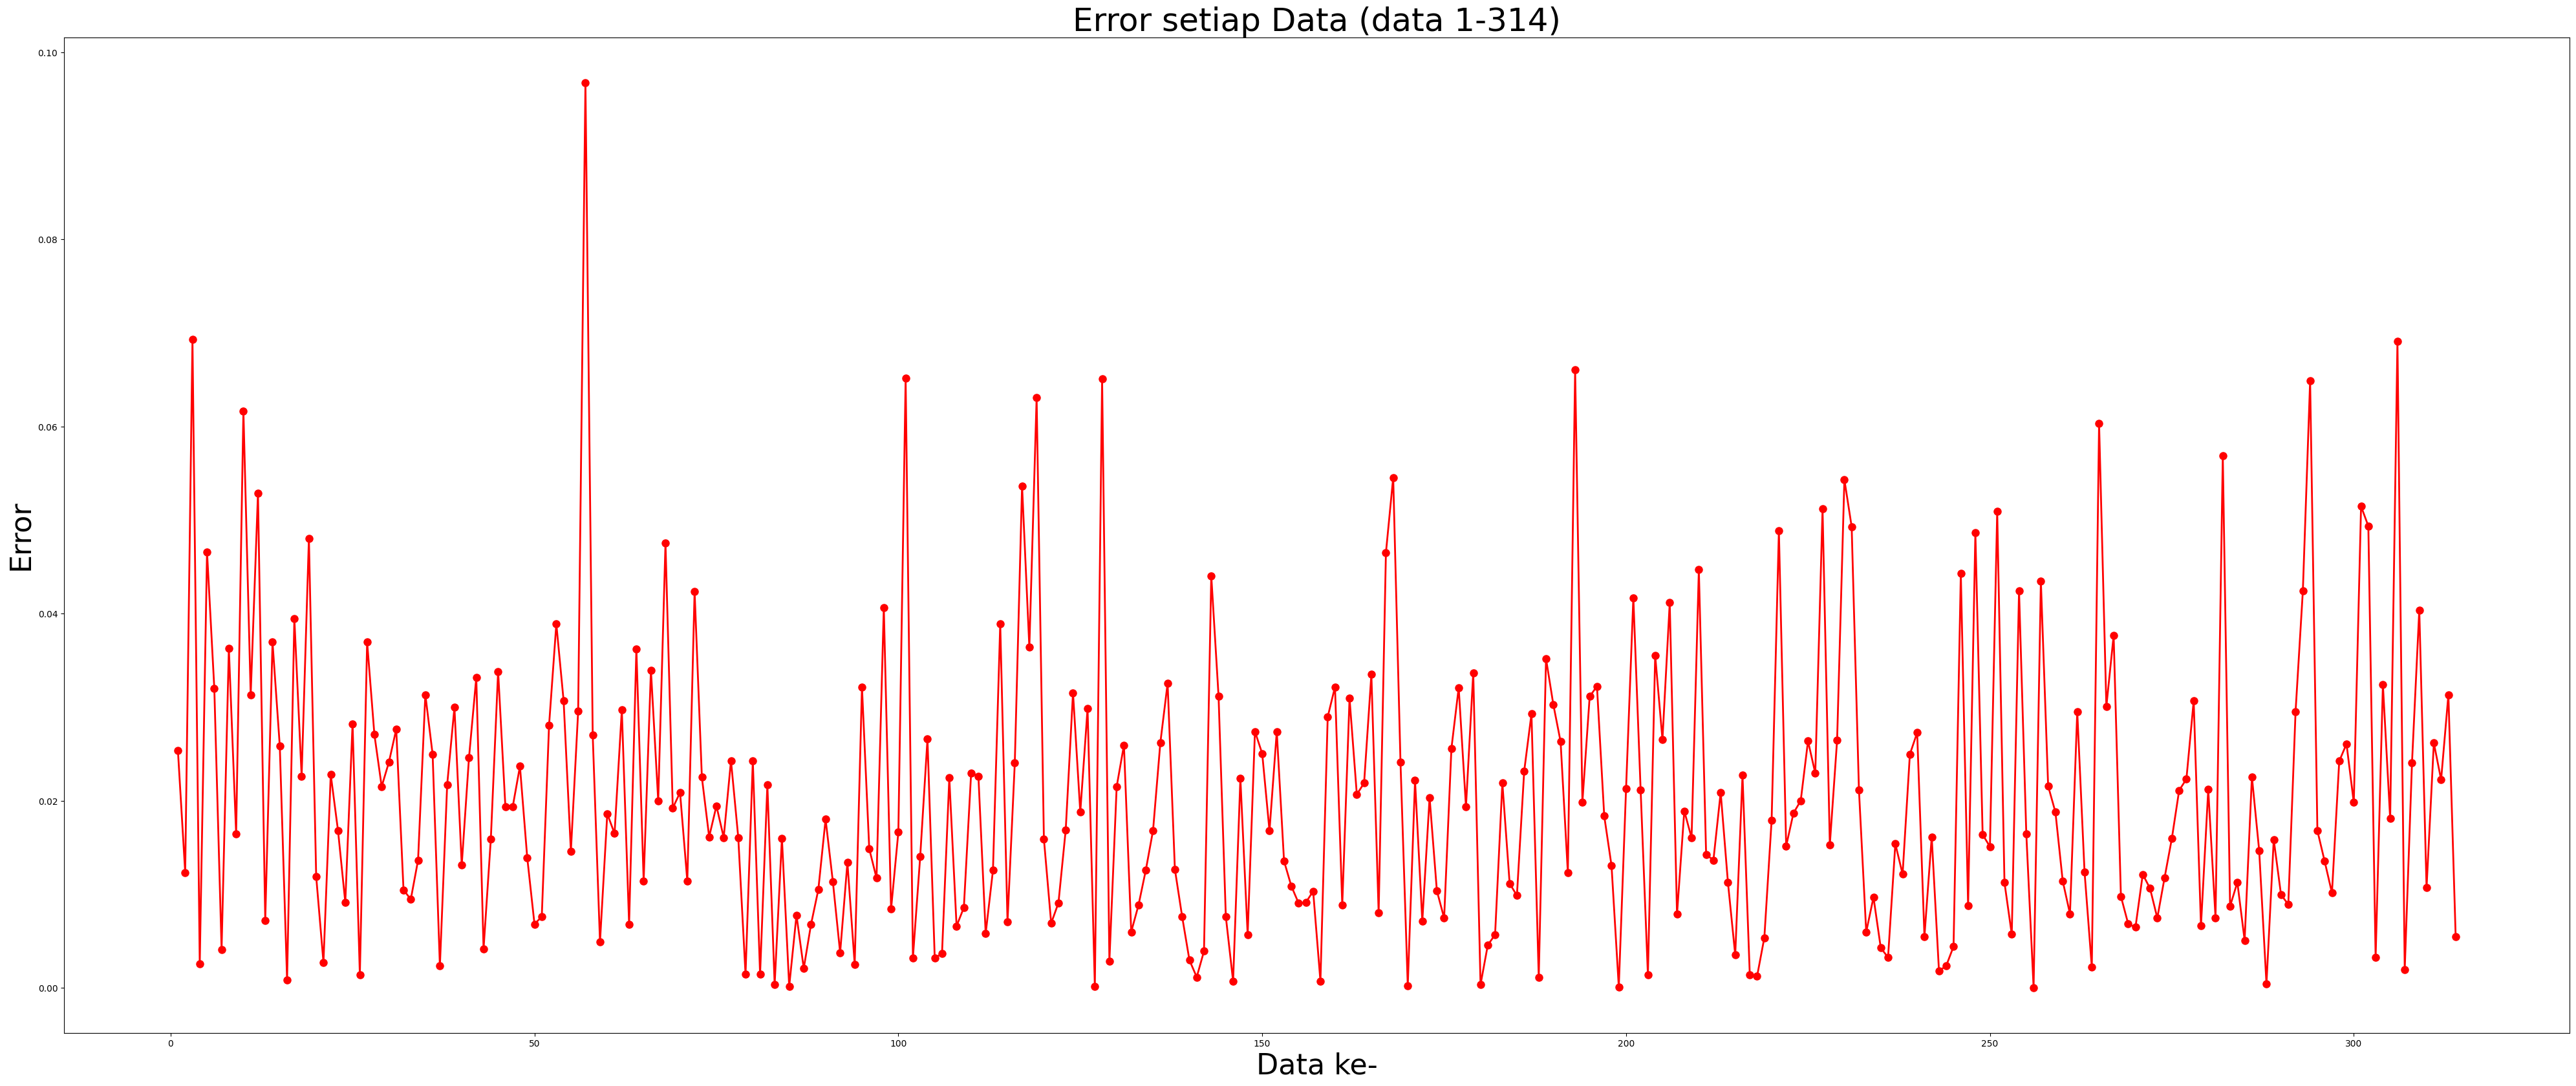

In [19]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[:314], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 1-314)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

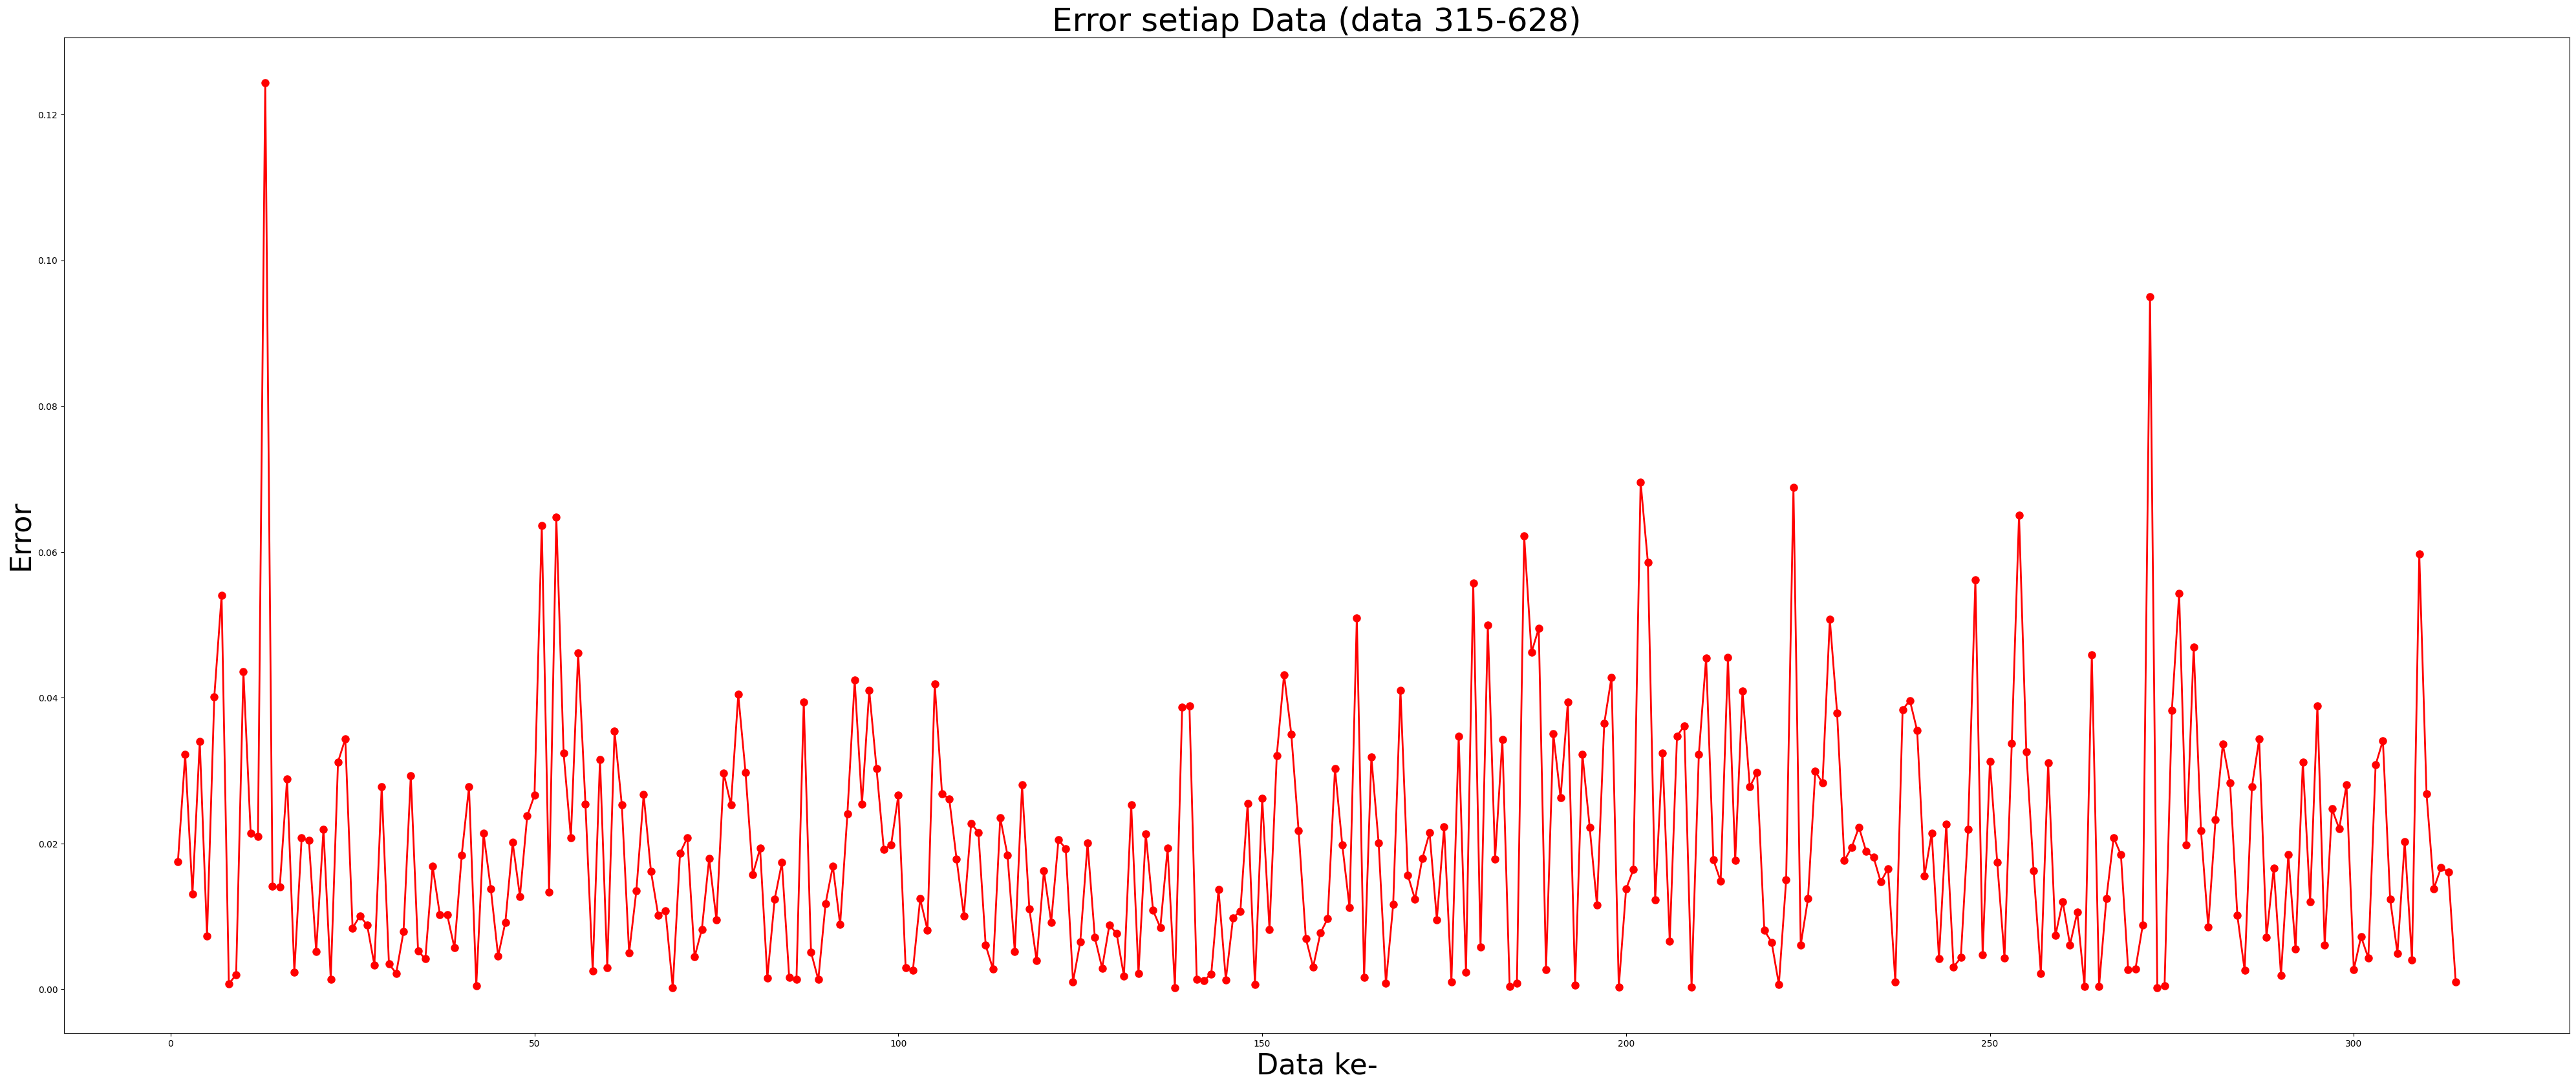

In [20]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[314:], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 315-628)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

In [23]:
max_error = max(error)
min_error = min(error)
rerata_error = sum(error) / len(error)
print(f"Maksimal Error: {max_error}")
print(f"Minimal Error: {min_error}")
print(f"Rerata Error: {rerata_error}")

Maksimal Error: 0.12438672891729077
Minimal Error: 3.583058286082963e-05
Rerata Error: 0.020286010600052768


In [22]:
for i in range(len(y_test)):
    print(f"Aktual: {y_test[i][0]} - Prediksi: {prediksi[i]}")

Aktual: 0.8115351004951937 - Prediksi: 0.8369081877231505
Aktual: 0.7084182930381591 - Prediksi: 0.7207551361578298
Aktual: 0.4280512671133119 - Prediksi: 0.49734280334394165
Aktual: 0.546315176230702 - Prediksi: 0.5437570053969558
Aktual: 0.670404893678998 - Prediksi: 0.7170096356483151
Aktual: 0.8323623652781823 - Prediksi: 0.8643915498816347
Aktual: 0.6996795805418001 - Prediksi: 0.6955606412318177
Aktual: 0.6318089134867463 - Prediksi: 0.6681092967078375
Aktual: 0.6894844159627147 - Prediksi: 0.7059540322660836
Aktual: 0.6307893970288377 - Prediksi: 0.6924695272103704
Aktual: 0.9094086804544133 - Prediksi: 0.9407037768388857
Aktual: 0.5525779201864259 - Prediksi: 0.6054381163187856
Aktual: 0.5266530731138945 - Prediksi: 0.5194218328889079
Aktual: 0.7746868628022138 - Prediksi: 0.8116404145695295
Aktual: 0.6893387707544422 - Prediksi: 0.7151697831503104
Aktual: 0.5576755024759685 - Prediksi: 0.5585380212646797
Aktual: 0.6479755316050102 - Prediksi: 0.6874420754566792
Aktual: 0.48762